# Libraries

In [8]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for importing images to arrays
import glob
from PIL import Image

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# KNN
from sklearn import neighbors

# SVM
from sklearn.svm import SVC


# openml.org is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.
from sklearn.datasets import fetch_openml


# Import Data

In [2]:
# Load data from https://www.openml.org/d/554
# return_X_y returns (data, target) instead of a Bunch object.
# as_frame is False since we want numpy arrays instead of datasets for modelling

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [48]:
filelist = glob.glob('./images/*.jpg')

In [49]:
temp1 = np.array([np.array(Image.open(fname)) for fname in filelist])

In [50]:
temp1.shape

(9, 28, 28, 3)

In [51]:
my_numbers = temp1.mean(axis=3).reshape(9,784)
my_numbers.shape

(9, 784)

In [55]:
# Standardizing the pixels array
my_numbers = preprocessing.normalize(my_numbers, norm='max')

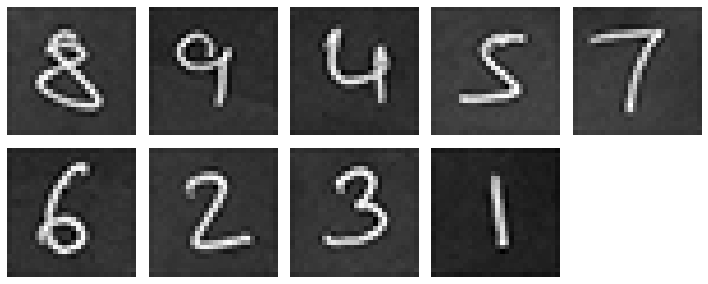

In [64]:
## function that displays a digit given its vector representation
def get_number(x):
    plt.axis('off')
    plt.imshow(x.reshape(28,28), cmap=plt.cm.gray)
    
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(5,5, i+1)
    get_number(my_numbers[i,])
    
plt.tight_layout()
plt.show()

In [73]:
my_numbers_label = np.array(['8','9','4','5','7','6','2','3','1'])

# Data Preprocessing

In [53]:
# The import returns an array with 70k image arrays (pixels)
X.shape

(70000, 784)

In [54]:
# and corresponding labels
y.shape

(70000,)

In [57]:
# Standardizing the pixels array
X = preprocessing.normalize(X, norm='max')

In [58]:
# As a first preprocessing step, we should split the dataset into training and test datasets
trainSize = 60000
testSize = 10000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=trainSize, test_size=testSize)

## Visualizing the dataset

Each data point is stored as 784-dimensional vector. To visualize a data point, we first need to reshape it to a 28 x 28 image.

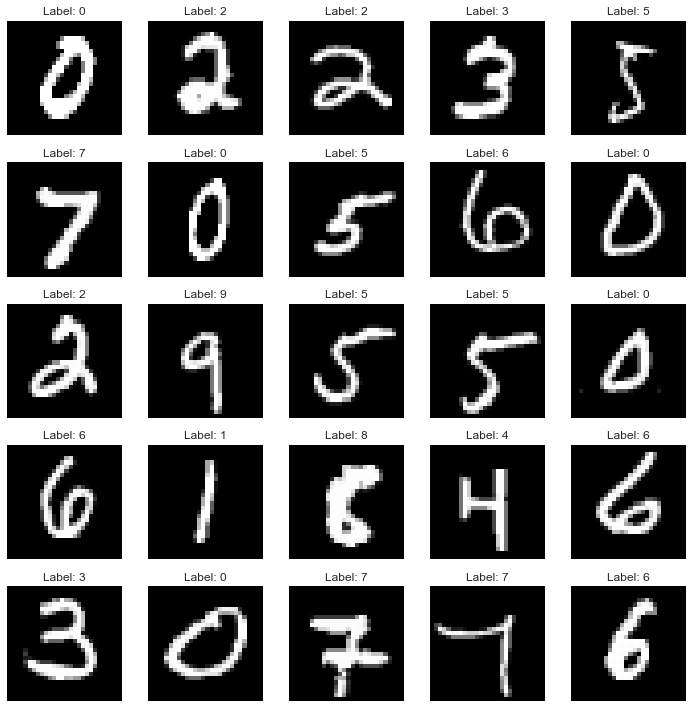

In [79]:
# function that displays a digit given its vector representation
def get_numberLabel(x, label):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.title('Label: ' + str(label))
    
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    get_numberLabel(X_test[i,], y_test[i])
    
plt.tight_layout()
plt.show()

# K-nearest neighbors (KNN) classifier

In [83]:
# Build nearest neighbor structure on training data
t_before = time.time()
model_KNN = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
t_after = time.time()
## Compute training time
t_training_KNN = t_after - t_before
print("Time to build KNN neighbor classfier on training data (seconds): ", t_training_KNN)

Time to build KNN neighbor classfier on training data (seconds):  20.763669967651367


In [84]:
my_pred_KNN = model_KNN.predict(my_numbers)
my_pred_KNN

array(['8', '4', '4', '5', '1', '6', '2', '3', '1'], dtype=object)

In [85]:
# evaluate the classifier
t_accuracy = sum(my_pred_KNN == my_numbers_label) / float(len(my_numbers_label))
t_accuracy

0.7777777777777778

In [102]:
model_KNN.kneighbors([my_numbers[1,]])

(array([[9.18418233, 9.22372869, 9.2927124 ]]), array([[40080, 53275, 30391]]))

In [105]:
y_train[30391]



'9'

In [95]:
my_numbers[4]

array([0.20821114, 0.23753666, 0.20821114, 0.19941349, 0.2111437 ,
       0.2170088 , 0.22140762, 0.23020528, 0.22580645, 0.23313783,
       0.23460411, 0.2170088 , 0.20381232, 0.2111437 , 0.2111437 ,
       0.22140762, 0.2170088 , 0.22434018, 0.25953079, 0.26979472,
       0.26099707, 0.26099707, 0.24926686, 0.25366569, 0.26099707,
       0.25806452, 0.25806452, 0.24046921, 0.23900293, 0.23020528,
       0.23753666, 0.23900293, 0.22434018, 0.23020528, 0.25073314,
       0.25513196, 0.25513196, 0.24633431, 0.23900293, 0.228739  ,
       0.23460411, 0.23460411, 0.23460411, 0.23460411, 0.25219941,
       0.26979472, 0.29765396, 0.27419355, 0.28739003, 0.28005865,
       0.28005865, 0.28739003, 0.2829912 , 0.2888563 , 0.29325513,
       0.27565982, 0.22140762, 0.24633431, 0.25219941, 0.24193548,
       0.23900293, 0.23460411, 0.23460411, 0.25953079, 0.25219941,
       0.24633431, 0.24633431, 0.23020528, 0.22580645, 0.23313783,
       0.24340176, 0.25953079, 0.25219941, 0.28592375, 0.28739

In [75]:
my_numbers_label

array(['8', '9', '4', '5', '7', '6', '2', '3', '1'], dtype='<U1')

In [11]:
## Get nearest neighbor predictions on testing data
t_before = time.time()
test_pred_KNN = model_KNN.predict(X_test)
t_after = time.time()
## Compute testing time
t_testing_KNN = t_after - t_before
print("Time to classify test set (seconds): ", t_testing_KNN)

Time to classify test set (seconds):  733.2063980102539


In [12]:
# evaluate the classifier
t_accuracy = sum(test_pred_KNN == y_test) / float(len(y_test))
t_accuracy

0.9731

<AxesSubplot:>

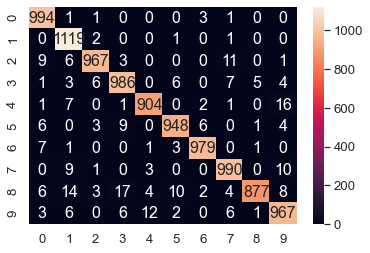

In [15]:
cm = metrics.confusion_matrix(y_test,test_pred_KNN)
df_cm = pd.DataFrame(cm, range(10), range(10))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d") 

# SVM Classification

In [17]:
model_SVM = SVC(C=1, kernel='poly', degree=2)
model_SVM.fit(X_train,y_train)

SVC(C=1, degree=2, kernel='poly')

In [18]:
print(model_SVM.score(X_test,y_test))

0.9775


<AxesSubplot:>

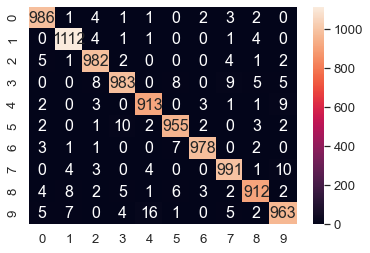

In [20]:
test_predictions_SVM = model_SVM.predict(X_test)
cm = metrics.confusion_matrix(y_test,test_predictions_SVM)
df_cm = pd.DataFrame(cm, range(10), range(10))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")